# Load Library

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Data

In [202]:
dataObj = datasets.load_iris()

In [203]:
dir(dataObj)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [204]:
print(dataObj.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [205]:
dataObj.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [206]:
dataObj.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [207]:
df = pd.DataFrame(dataObj.data, columns = dataObj.feature_names)
df['target'] = dataObj.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Explore Data

In [208]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [209]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

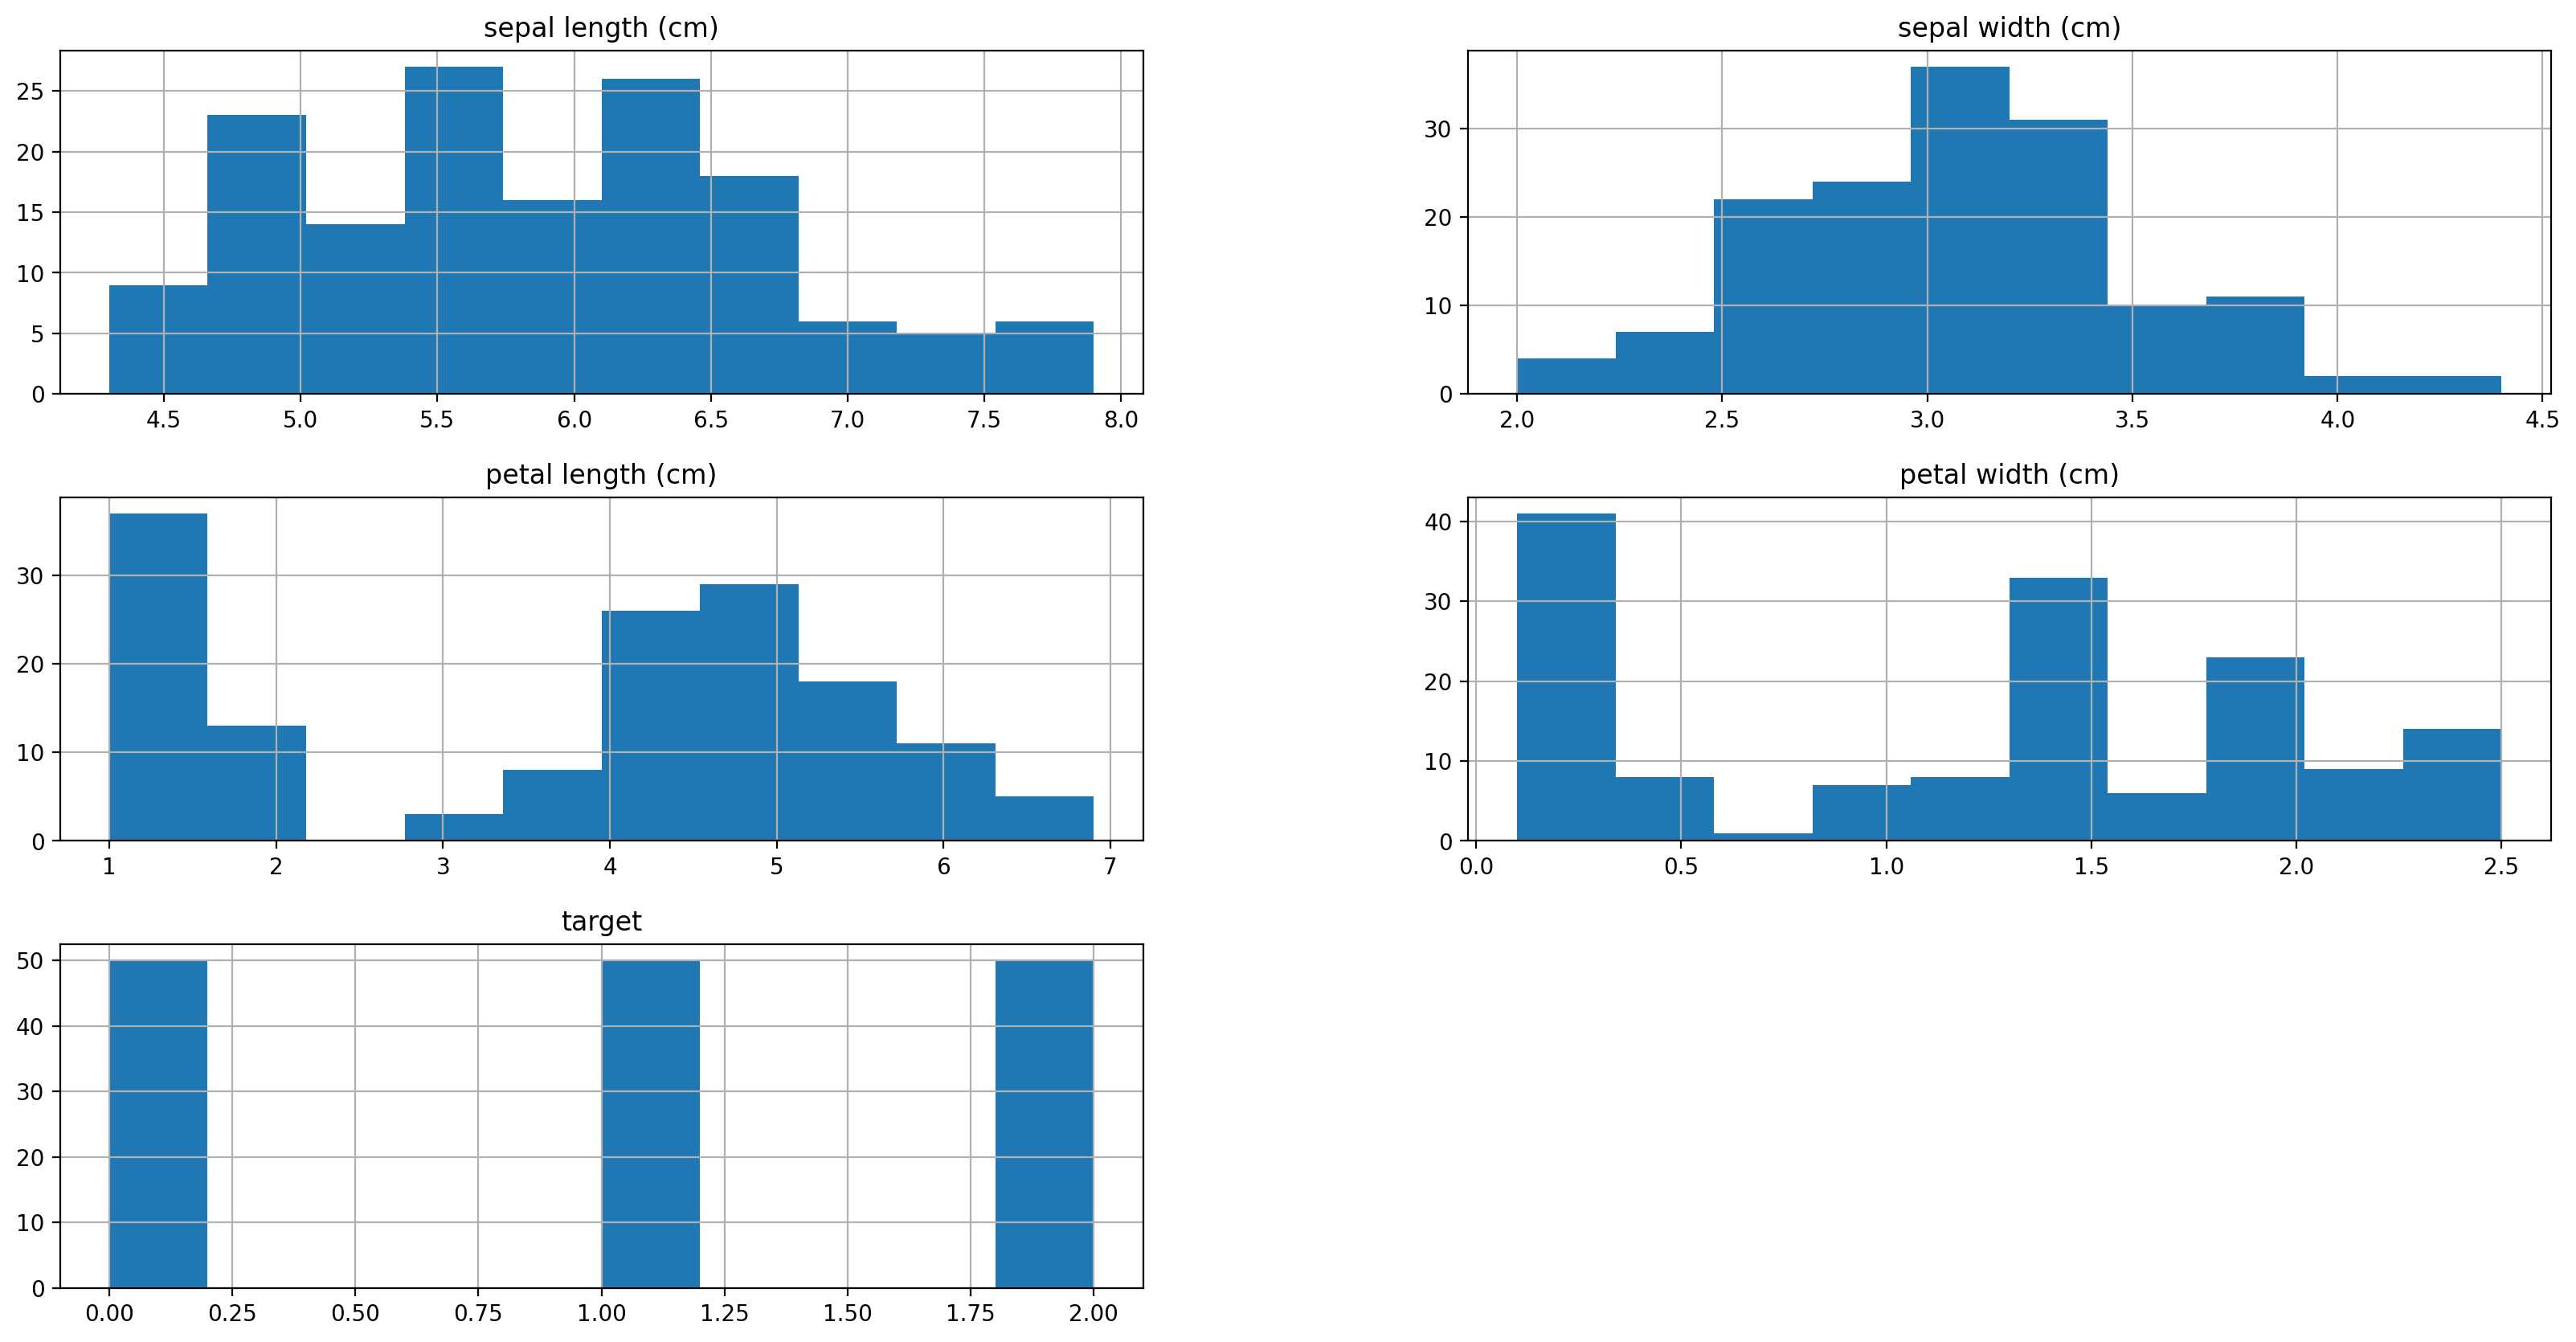

In [210]:
df.hist(layout = (3, 2), figsize = (20, 10));

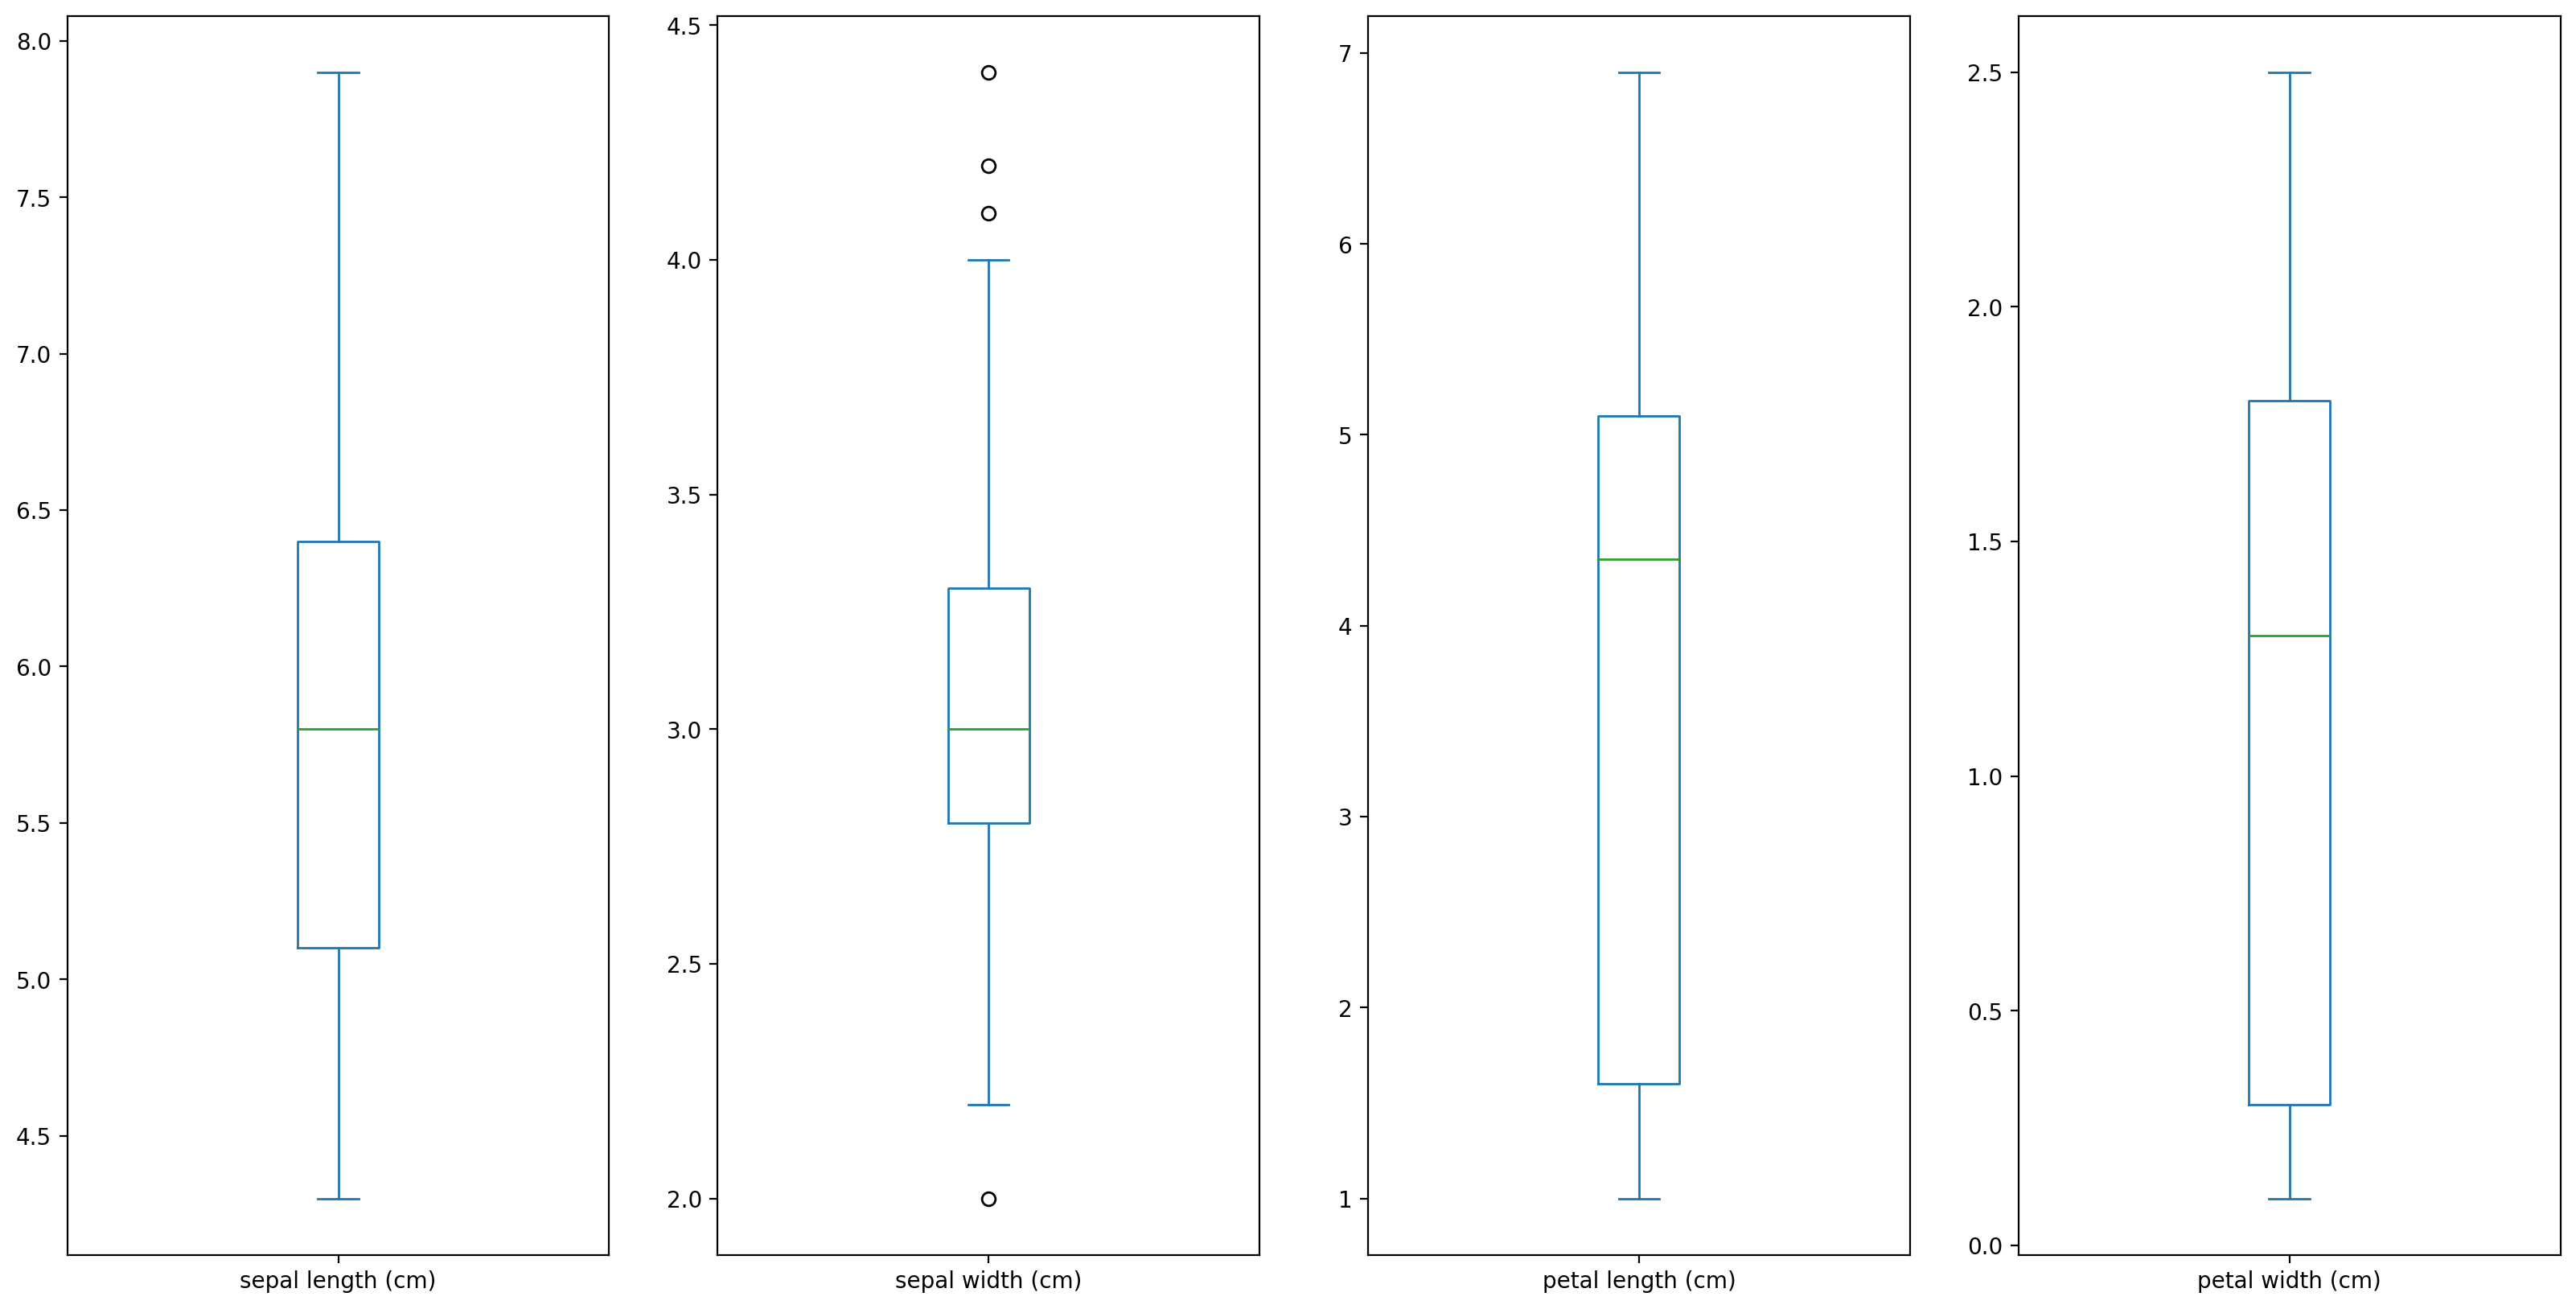

In [211]:
df[cols].plot(kind = 'box', figsize = (20, 10), subplots = True);

# Prepare data
- Choose only petal length and petal width as feature
- Eliminate oneclass of flower


In [212]:
df2 = df.iloc[:, [2, 3, 4]]
df2.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [213]:
df2['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [214]:
## selecting only target == 0, 1
df3 = df2[df.target != 2]
df3

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [215]:
df3.target.value_counts()

target
0    50
1    50
Name: count, dtype: int64

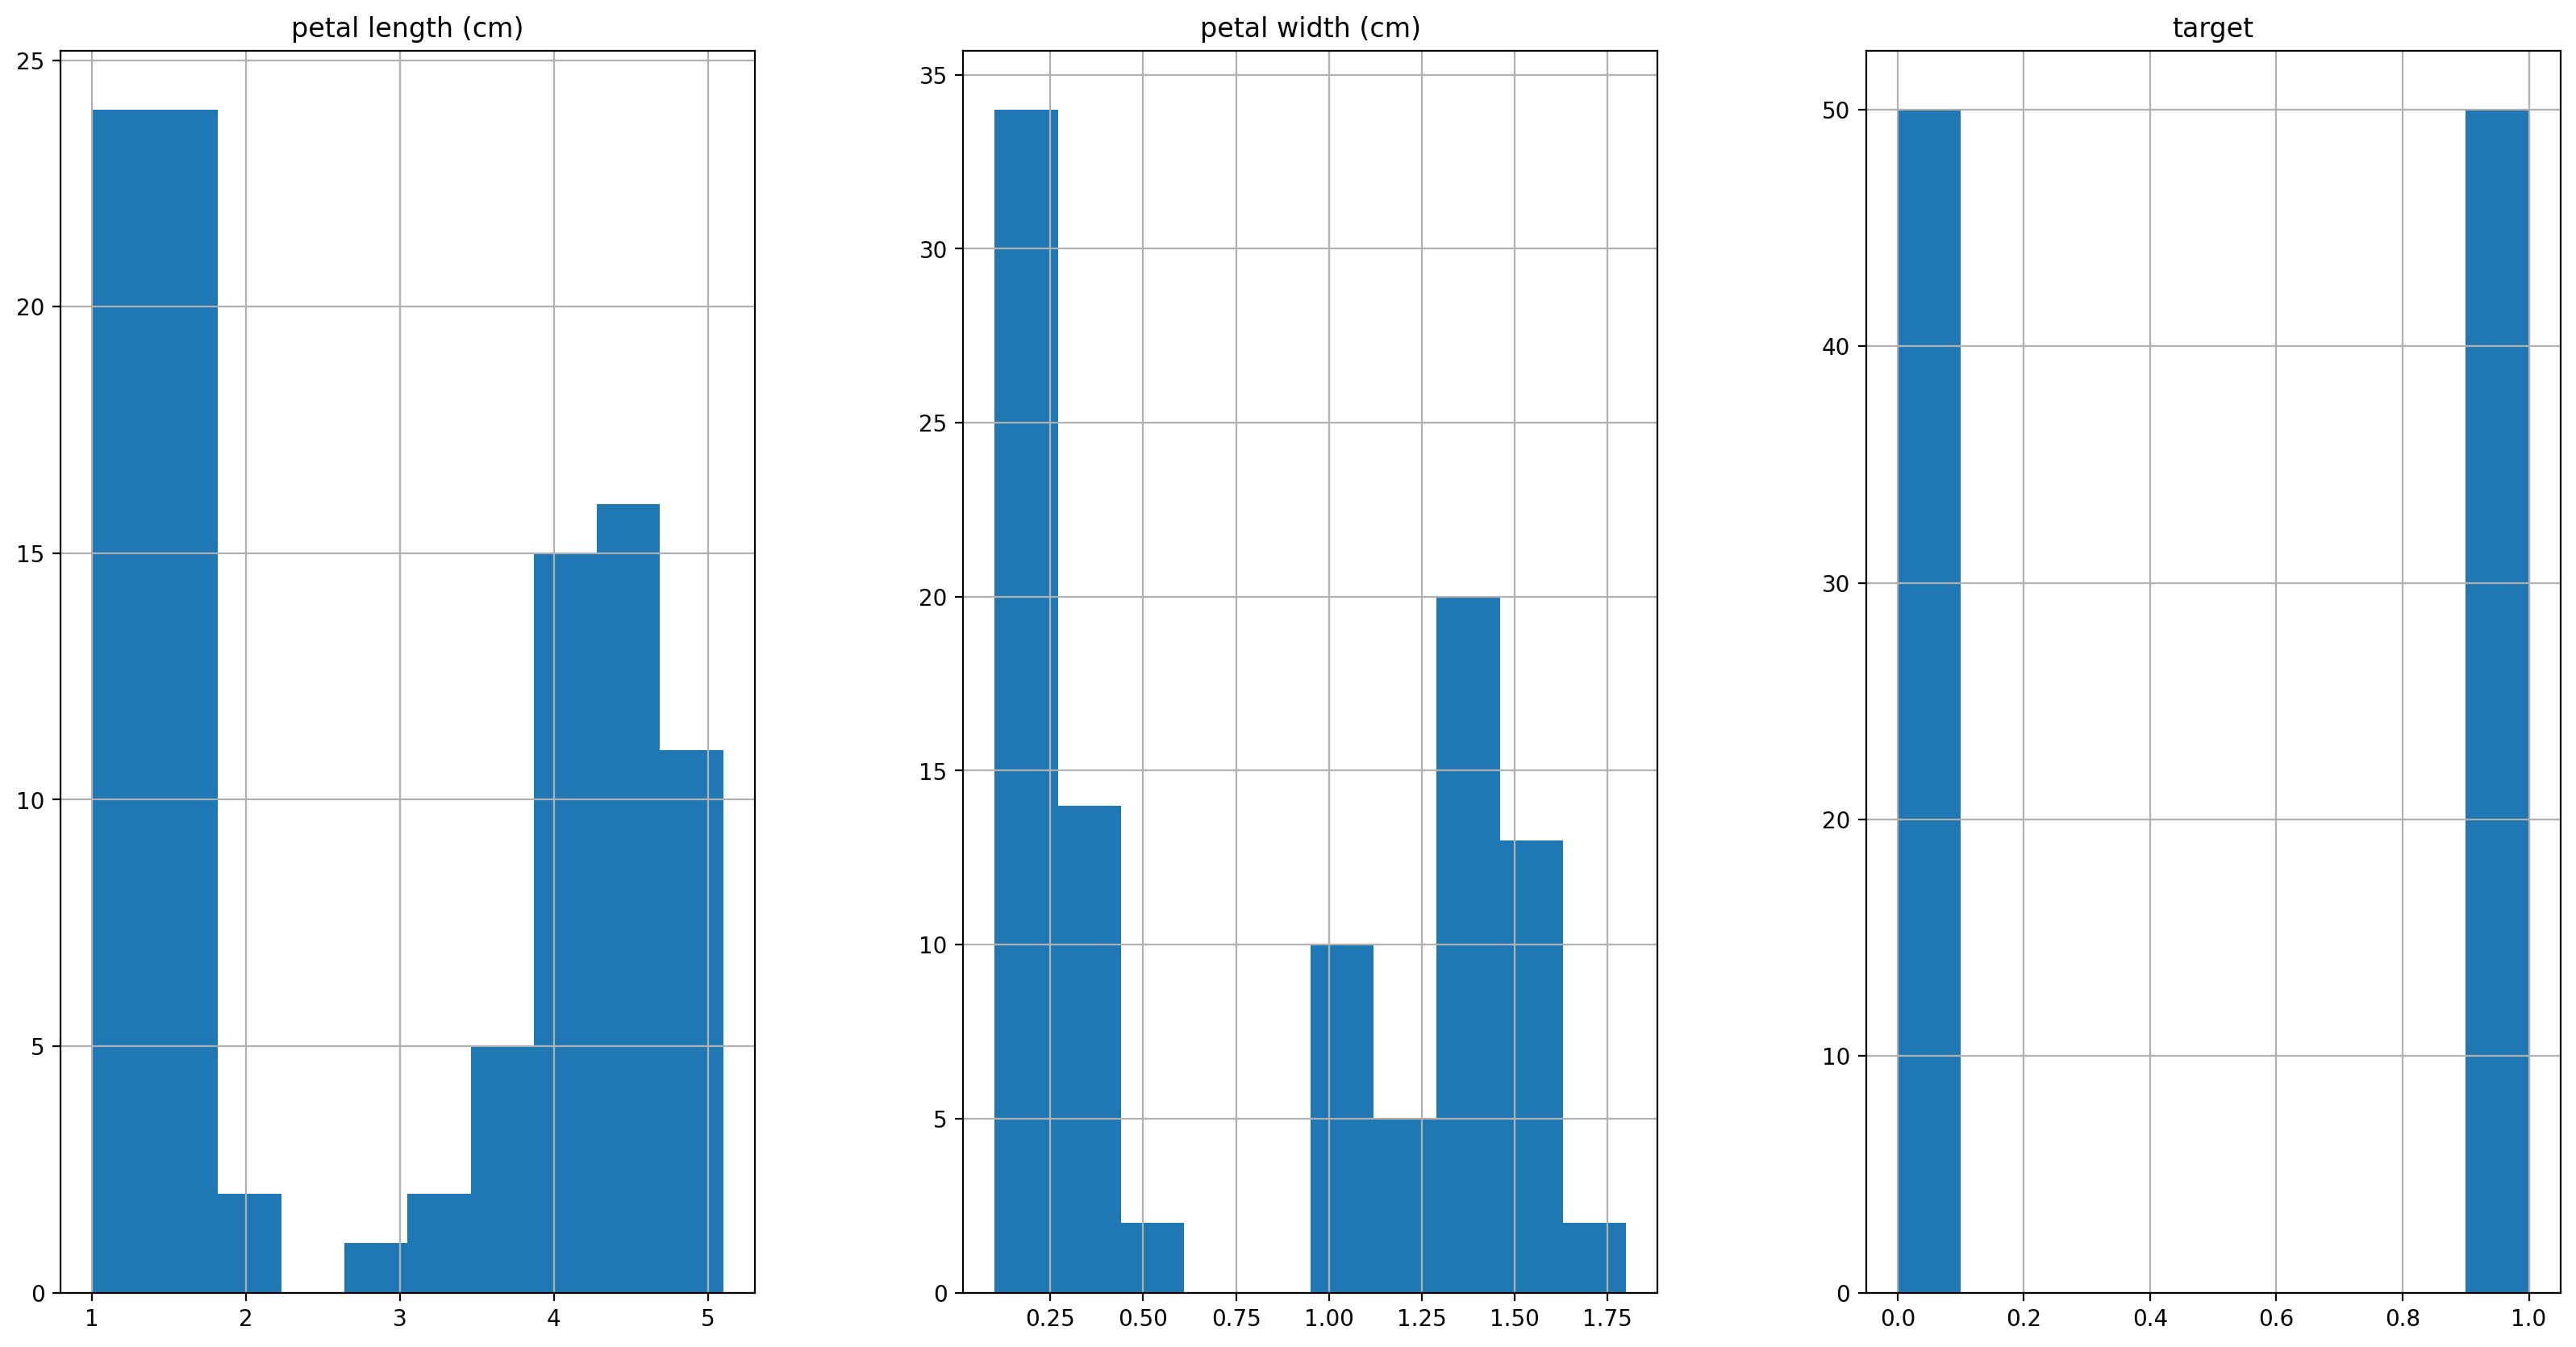

In [216]:
df3.hist(figsize = (20, 10), layout = (1, 3));

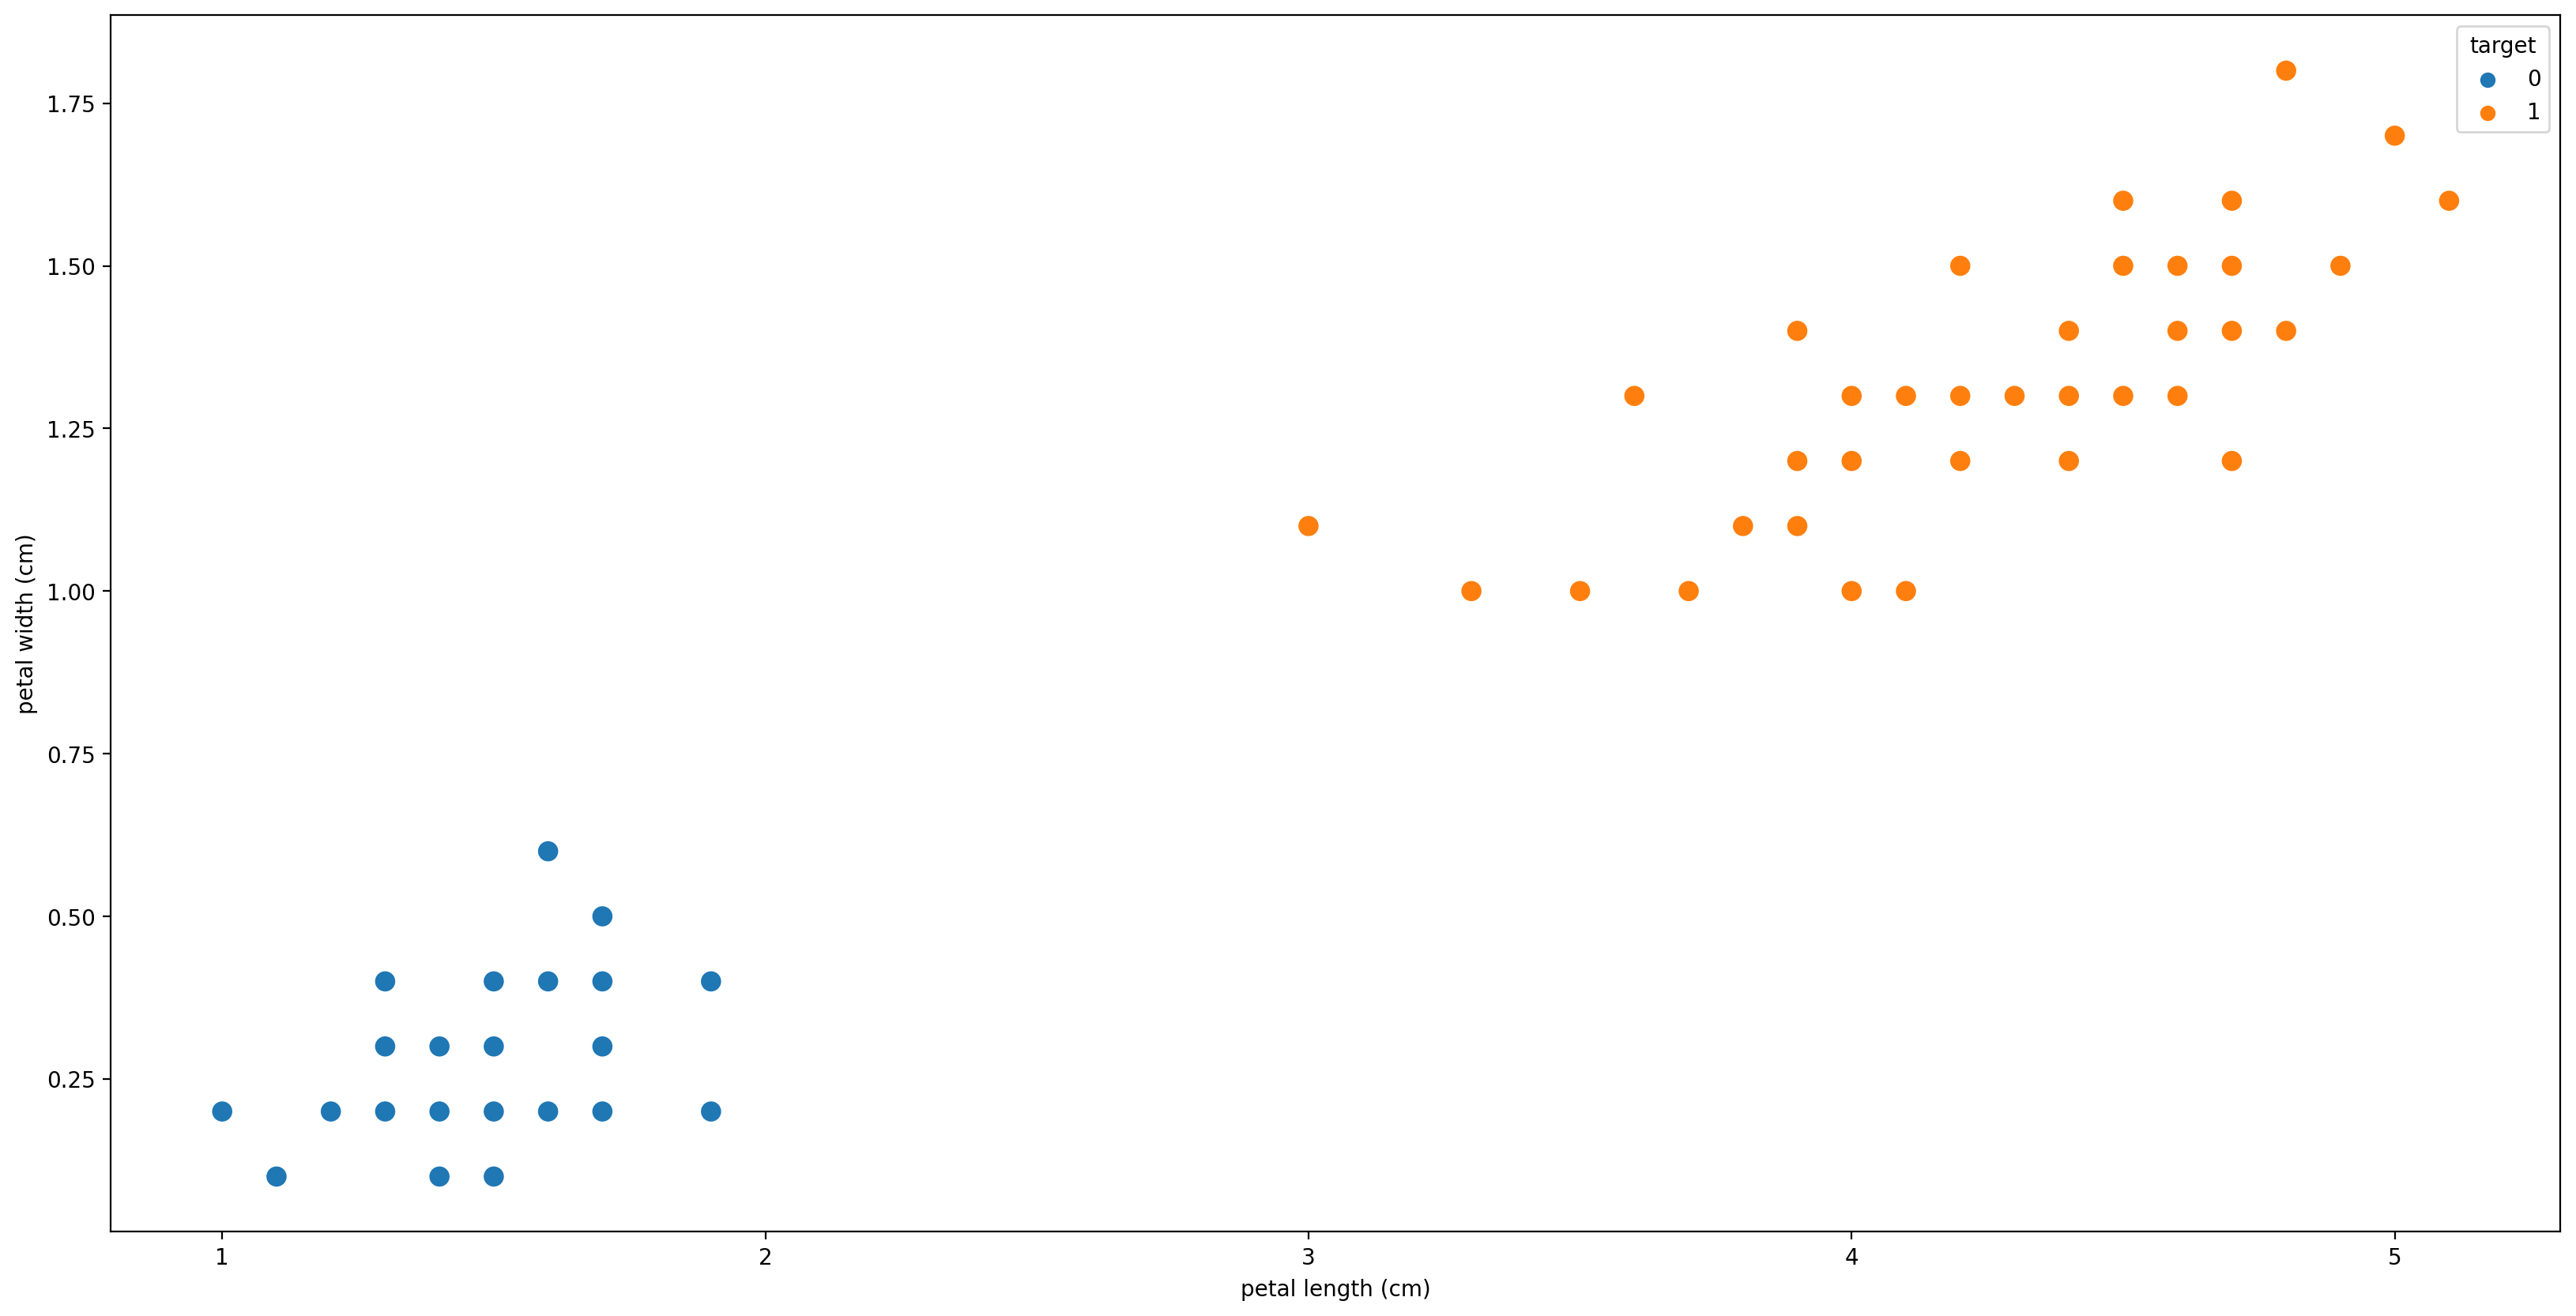

In [217]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = df3, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'target', s = 100);

In [218]:
X = df3.iloc[:, :2]#.values
X[:5]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [219]:
y = df3.iloc[:, 2]#.values
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

# Split data

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 1, stratify = y)

In [221]:
X_train[:5]

,petal length (cm),petal width (cm)
10,1.5,0.2
51,4.5,1.5
19,1.5,0.3
4,1.4,0.2
38,1.3,0.2


In [222]:
X_test[:5]

,petal length (cm),petal width (cm)
50,4.7,1.4
98,3.0,1.1
12,1.4,0.1
9,1.5,0.1
37,1.4,0.1


In [223]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_train.shape}')

X_train.shape = (70, 2)
X_test.shape = (30, 2)
y_train.shape = (70,)
y_test.shape = (70,)


# Feature Scaling
- Standardization

In [224]:
scaler = StandardScaler()

In [225]:
scaler.fit(X_train)

StandardScaler()

In [226]:
scaler.mean_

array([2.86571429, 0.78285714])

In [227]:
scaler.var_

array([2.10482449, 0.31627755])

In [228]:
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.fit_transform(X_test)

In [229]:
X_train_t[:5]

array([[-0.94135169, -1.03640128],
       [ 1.12647106,  1.27518   ],
       [-0.94135169, -0.85858733],
       [-1.01027912, -1.03640128],
       [-1.07920654, -1.03640128]])

In [230]:
X_train[:5]

,petal length (cm),petal width (cm)
10,1.5,0.2
51,4.5,1.5
19,1.5,0.3
4,1.4,0.2
38,1.3,0.2


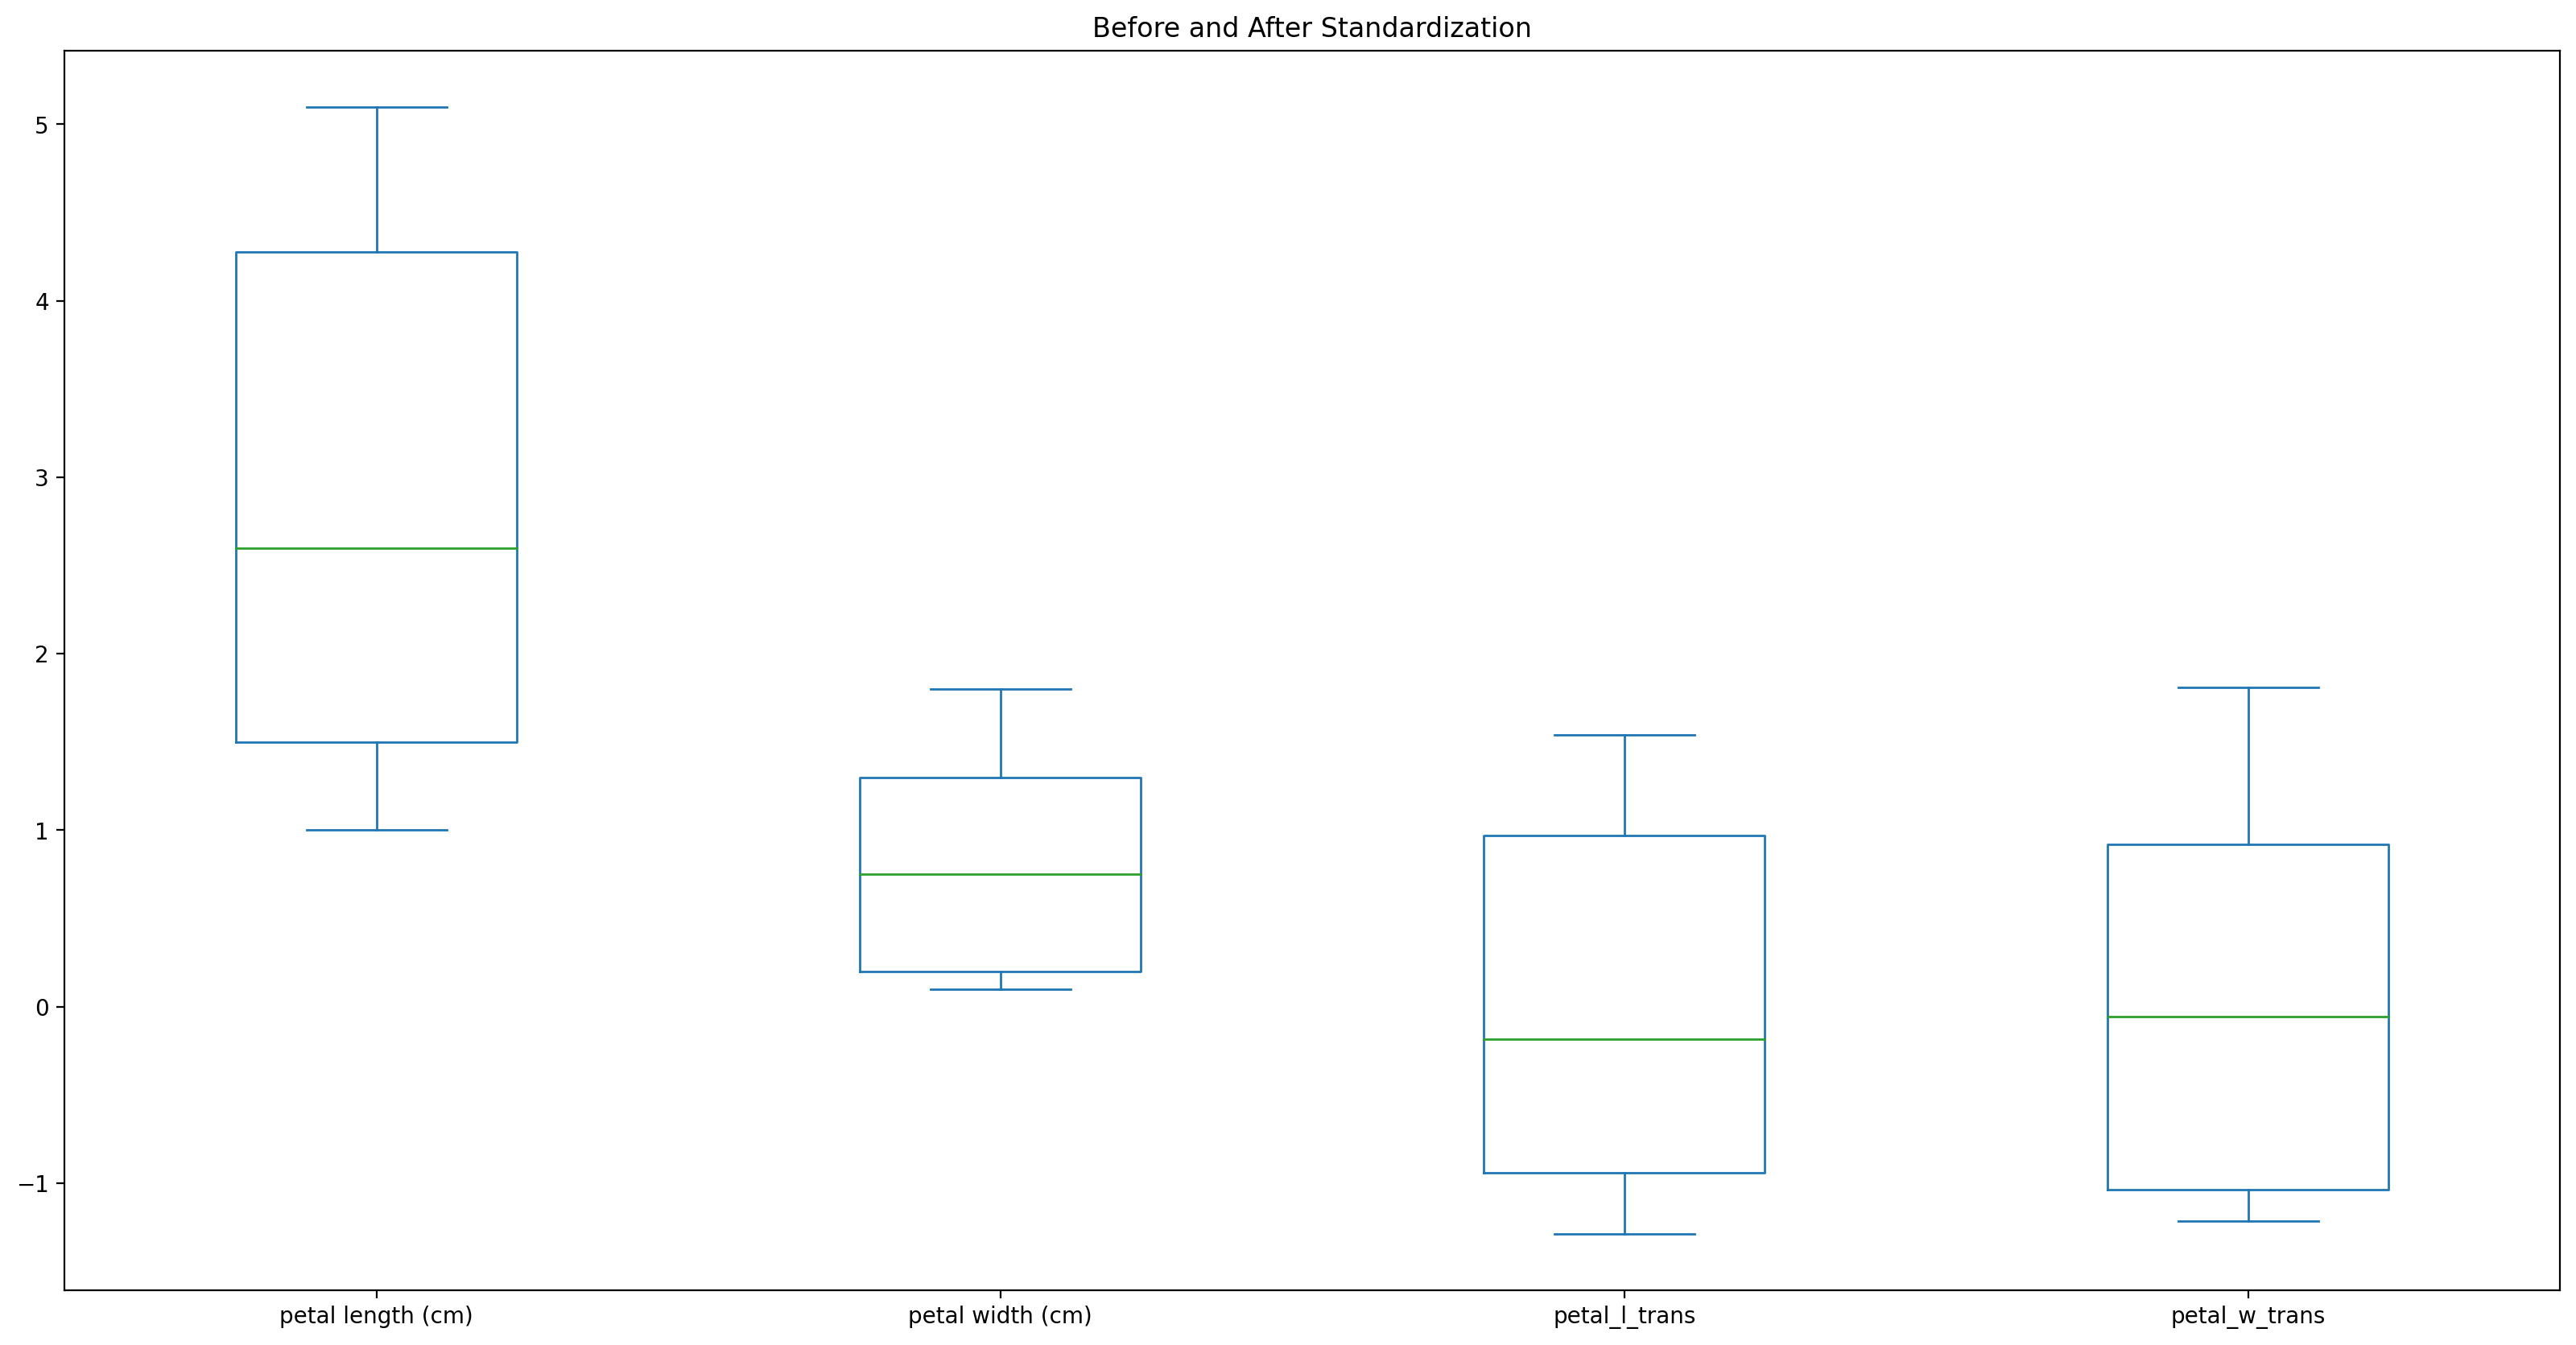

In [231]:
temp = pd.concat([X_train, pd.DataFrame(X_train_t, columns = ['petal_l_trans', 'petal_w_trans'])])
temp.plot(kind = 'box', figsize = (20, 10))
plt.title('Before and After Standardization');

# Model Training and Parameters
- model : Perceptron "Artificial neuron"

In [232]:
model = Perceptron()
model

Perceptron()

In [233]:
## Learing rate
eta0 = 0.01
## random_state
random_state = 1
## Number of iterations with no improvement to wait before early stopping.
n_iter_no_change = 10
## Max iterations
max_iter = 2000

In [234]:
model.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [235]:
## adjust hyperparapeter
model = Perceptron(eta0 = eta0, random_state=random_state, n_iter_no_change=n_iter_no_change, verbose=1, max_iter = 2000)
model

Perceptron(eta0=0.01, max_iter=2000, n_iter_no_change=10, random_state=1,
           verbose=1)

In [236]:
model.fit(X_train_t, y_train)

-- Epoch 1
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 70, Avg. loss: 0.000008
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 140, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 280, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 350, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 490, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 560, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
--

Perceptron(eta0=0.01, max_iter=2000, n_iter_no_change=10, random_state=1,
           verbose=1)

- Epoch : Number of pass through data (iteration)
- Avg. loss : Should be decreasing (reslut form loss function)
- Norm : Average of weight value
- NNZs : number of weight (length and width)
- Bias : intercept value

In [237]:
## weight value after fitting model
model.coef_

array([[0.01516403, 0.01244698]])

In [238]:
## Bias value (Intercept)
model.intercept_

array([0.])

# Evaluate model (Bias เพราะไม่มี validation set)

In [241]:
## model prediction
predicted = model.predict(X_test_t)

In [243]:
y_test.values

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

In [244]:
metrics.accuracy_score(y_test, predicted)

1.0

In [246]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Make Prediction

In [252]:
X1_min = X.iloc[:, 0].min()
X1_max = X.iloc[:, 0].max()
X2_min = X.iloc[:, 1].min()
X2_max = X.iloc[:, 1].max()

print(f'X1_min = {X1_min}')
print(f'X1_max = {X1_max}')
print(f'X2_min = {X2_min}')
print(f'X2_max = {X2_max}')

X1_min = 1.0
X1_max = 5.1
X2_min = 0.1
X2_max = 1.8


In [267]:
X1_new = np.random.uniform(low = X1_min, high = X1_max, size = (50, 1))
X2_new = np.random.uniform(low = X2_min, high = X2_max, size = (50, 1))
X_new = np.concatenate((X1_new, X2_new), axis = 1)
X_new[:5]

array([[1.66608063, 1.21389026],
       [2.8387522 , 1.62290383],
       [2.21025232, 0.72143724],
       [4.57339251, 1.58210847],
       [4.4472126 , 0.23850598]])

In [275]:
temp = pd.DataFrame(X_new, columns=['X1', 'X2'])
temp.head()

,X1,X2
0,1.666081,1.213890
1,2.838752,1.622904
2,2.210252,0.721437
3,4.573393,1.582108
4,4.447213,0.238506


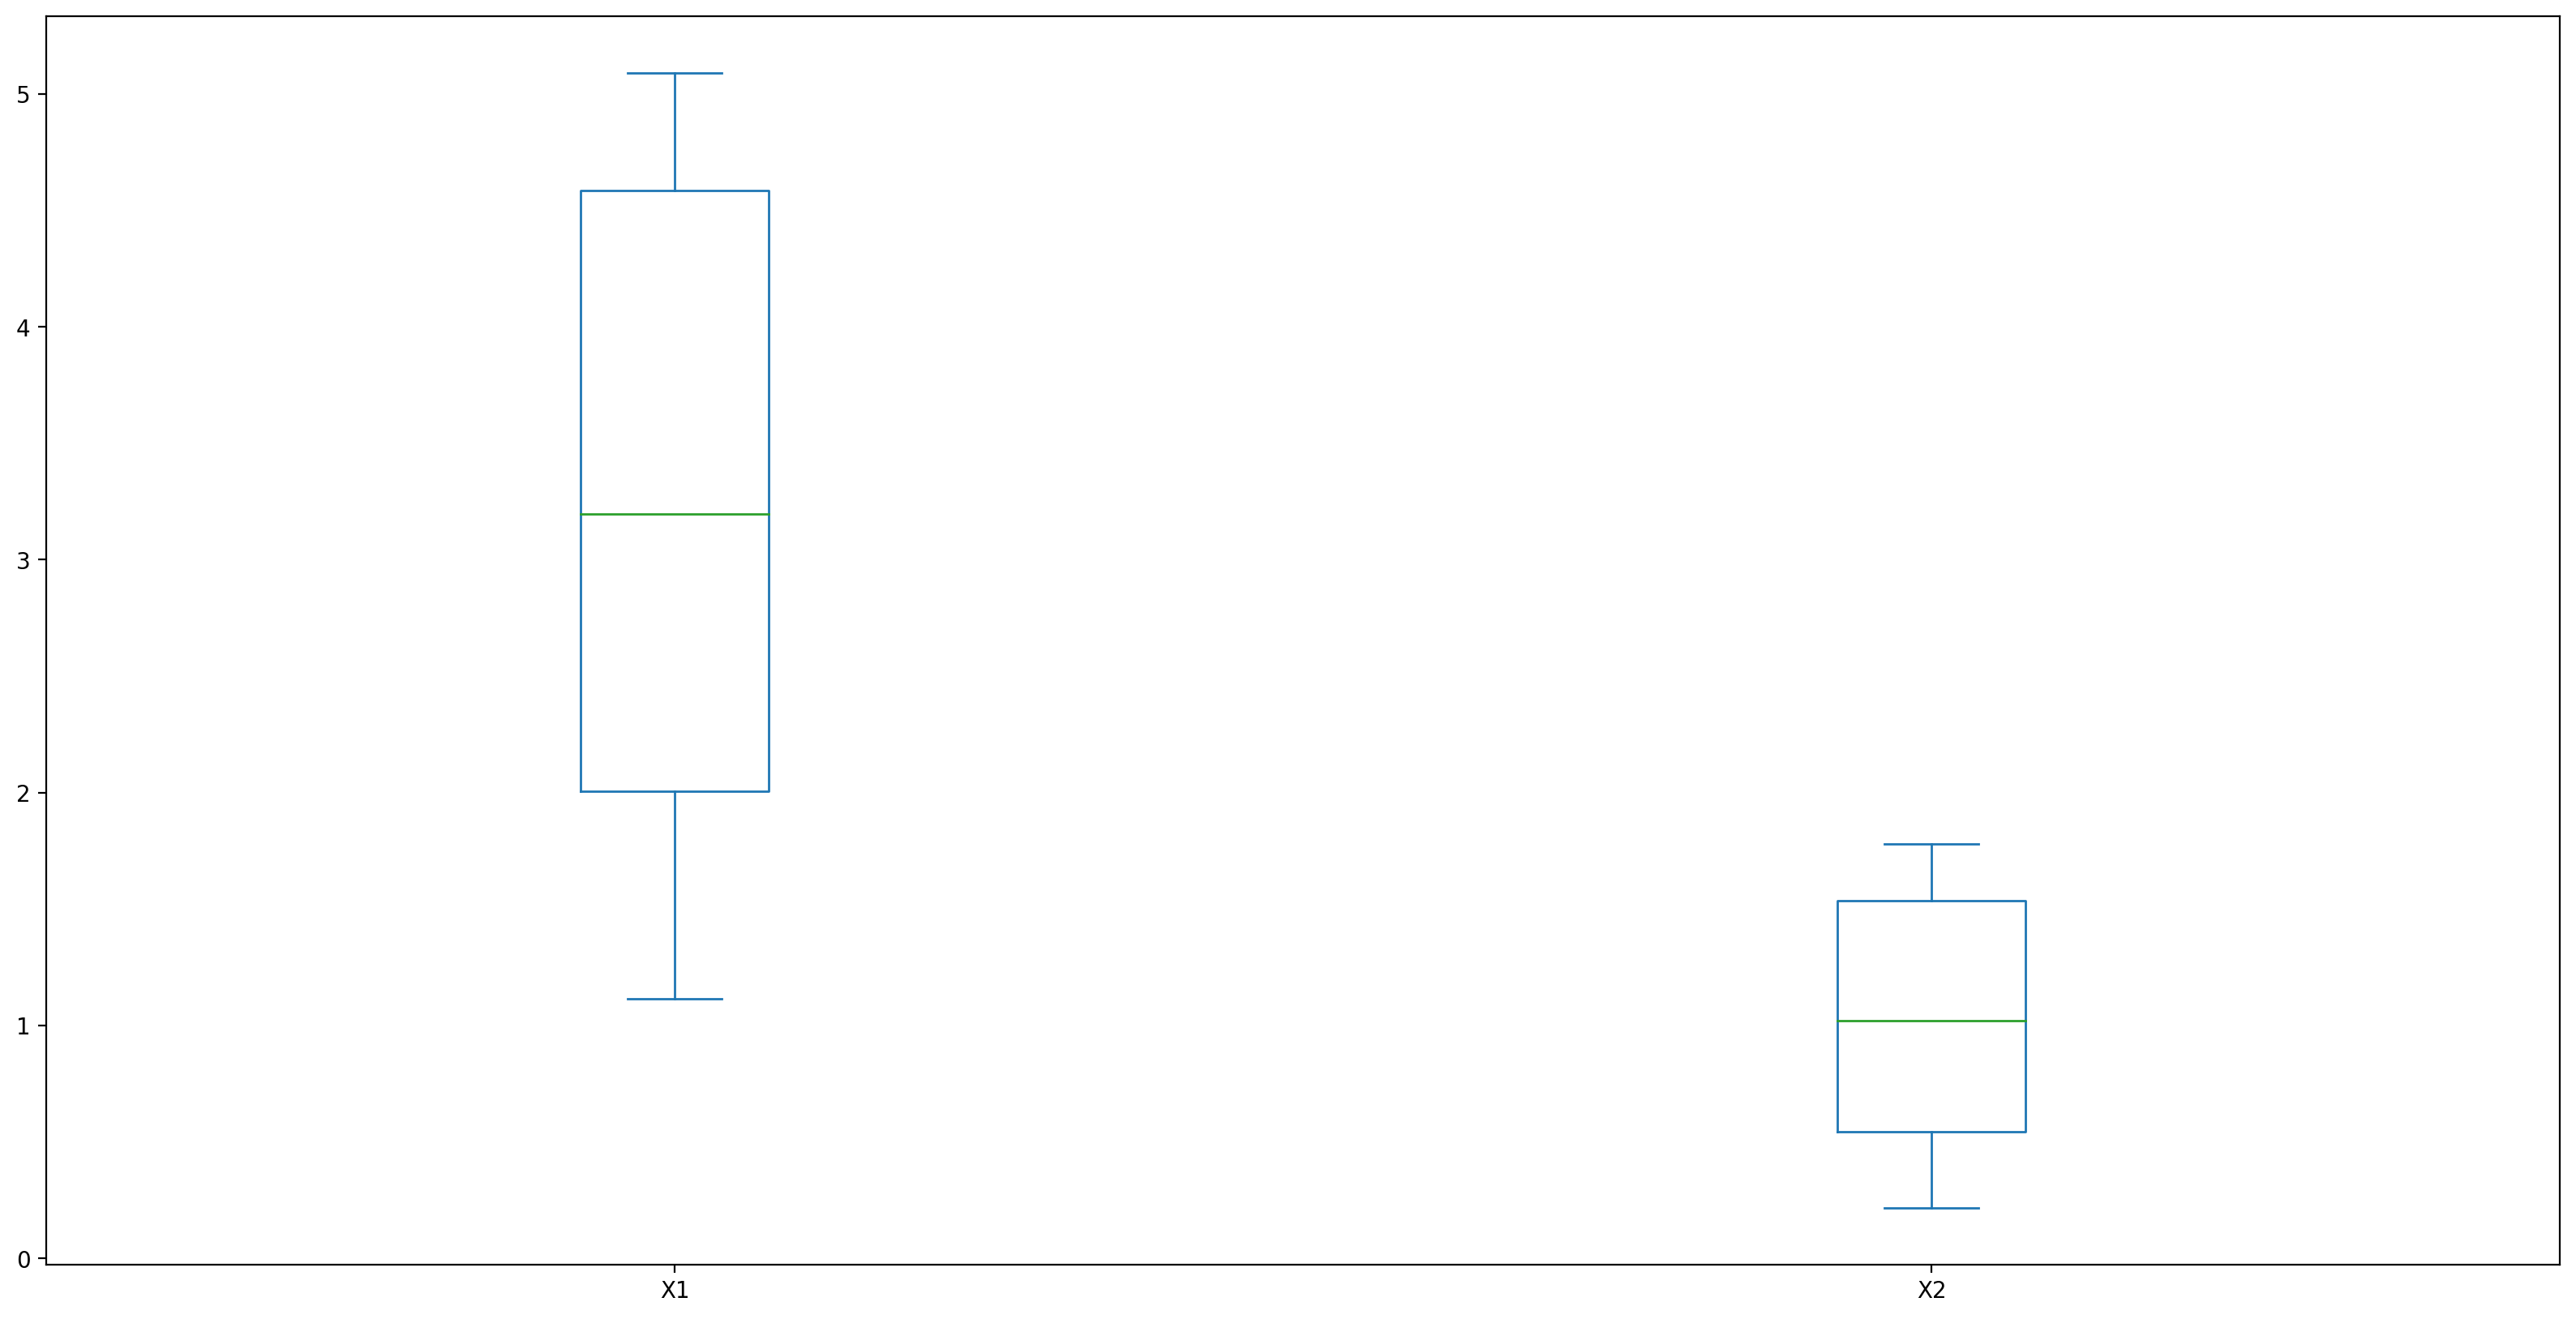

In [276]:
temp.plot(kind = "box", figsize = (20, 10));

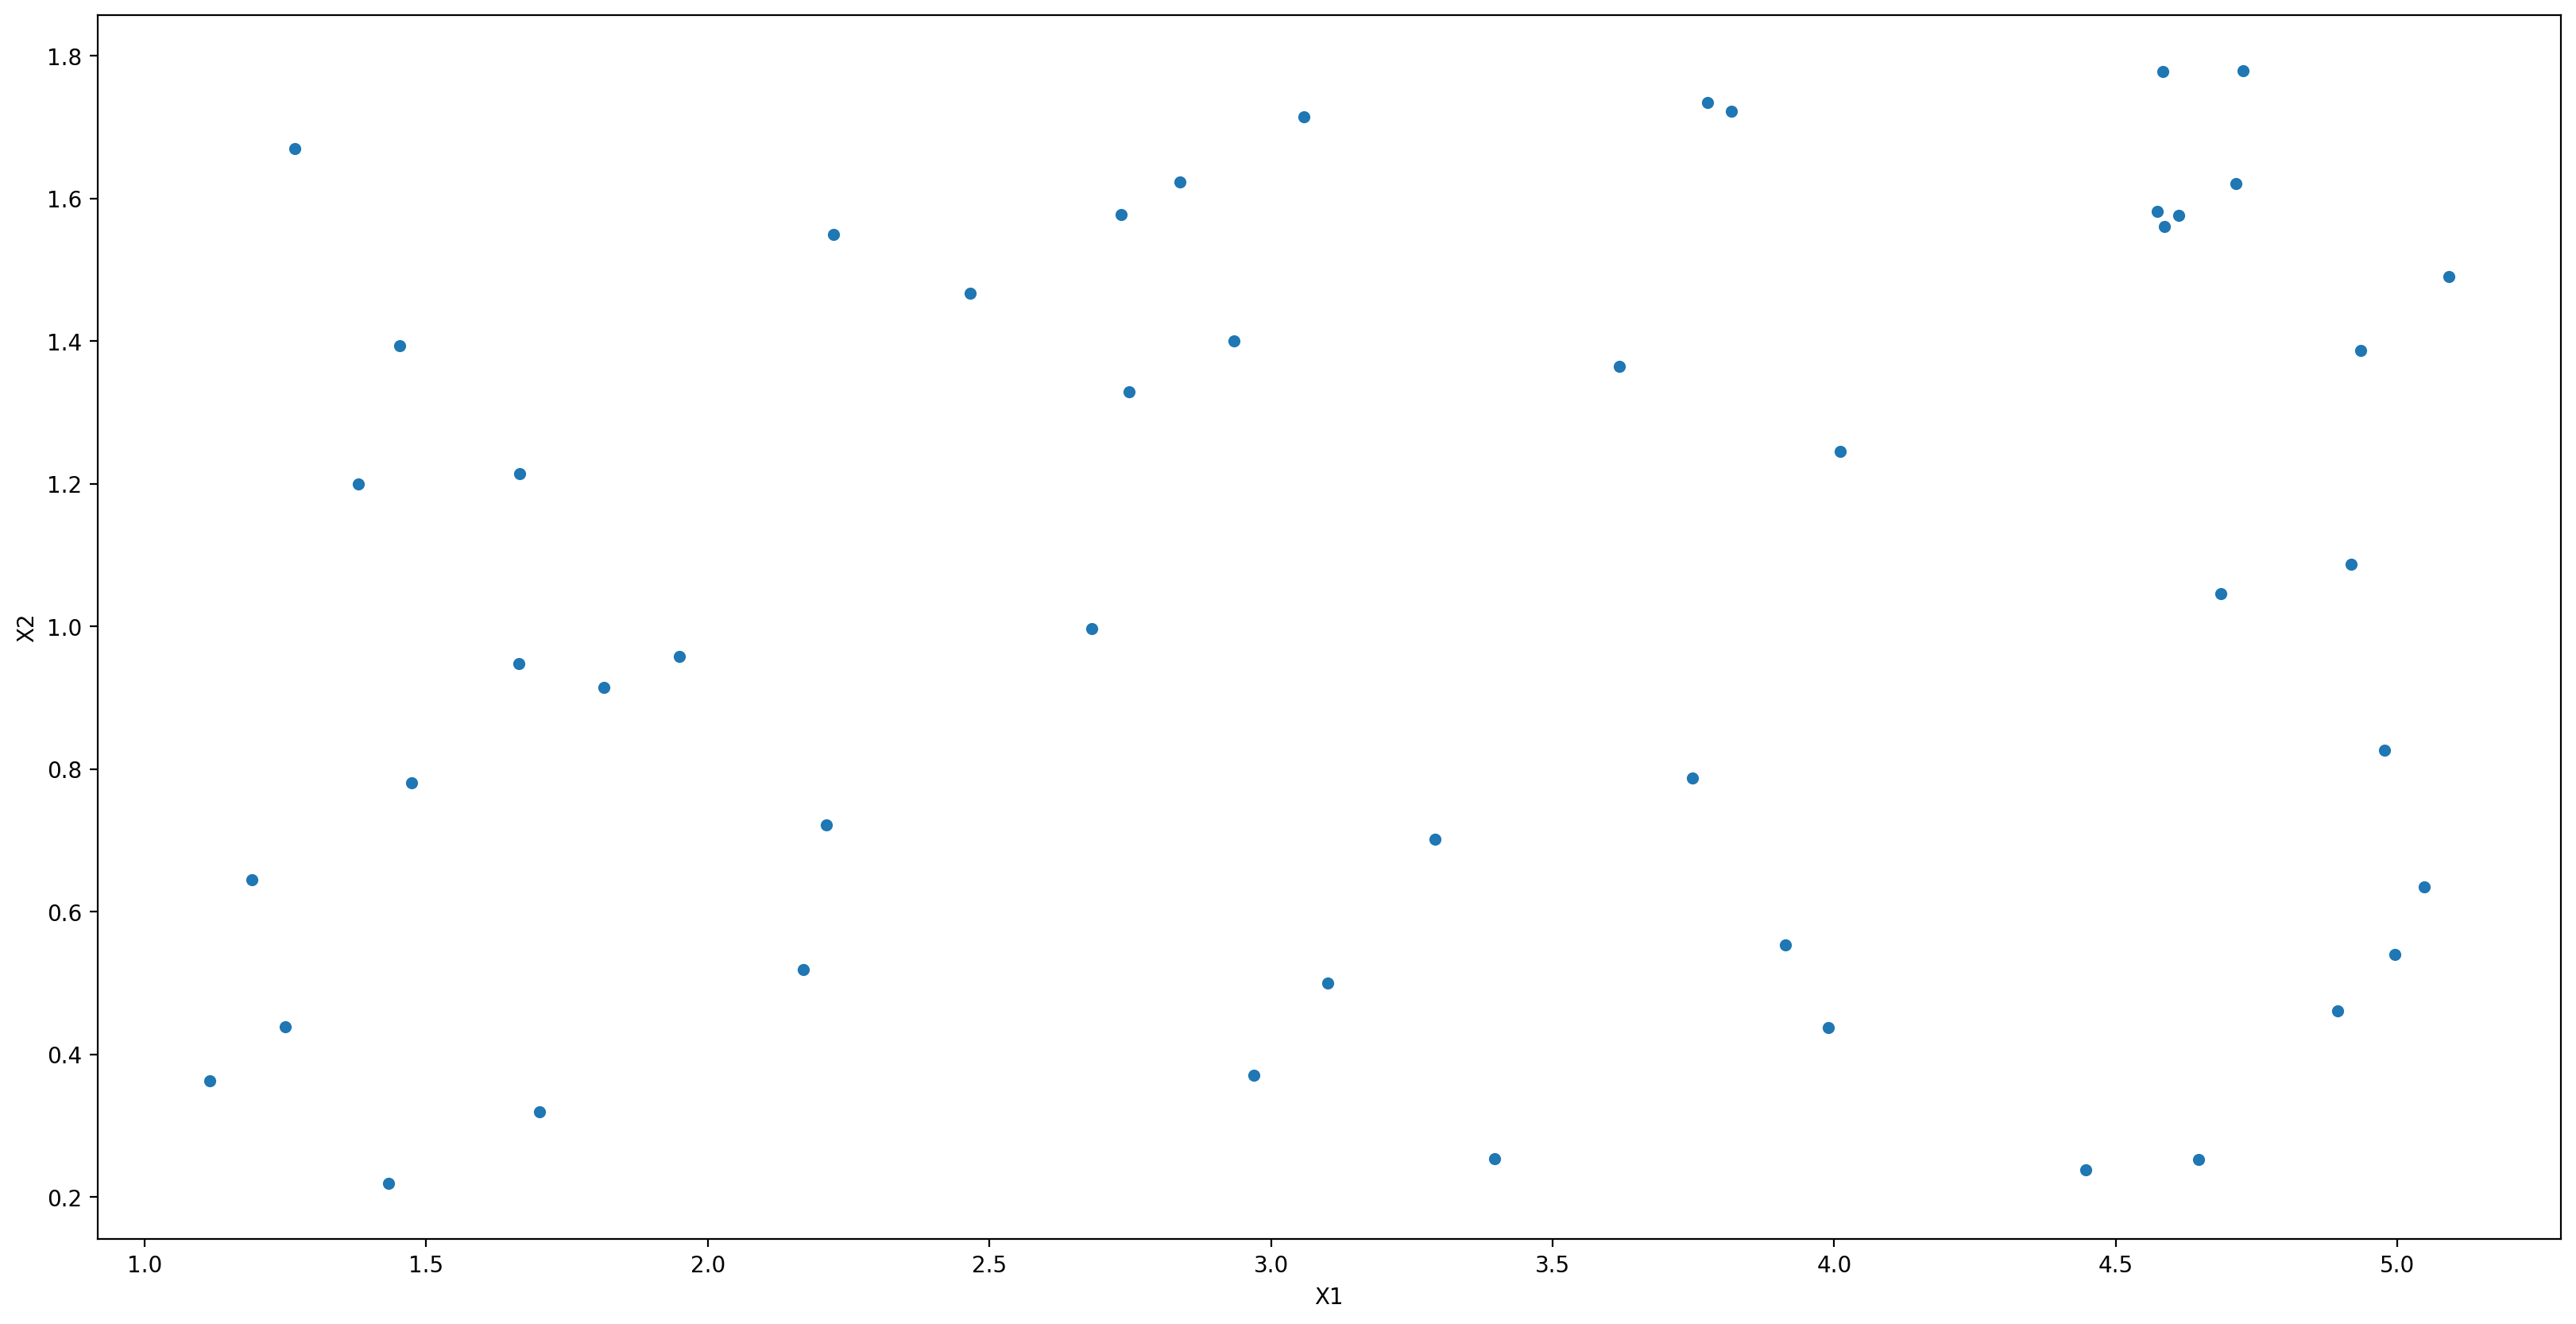

In [280]:
temp.plot(kind = 'scatter', x = 'X1', y = 'X2', figsize = (20, 10));

In [282]:
## standardized new data
X_new_std = scaler.fit_transform(X_new)
X_new_std[:5]

array([[-1.18718282,  0.36310175],
       [-0.2968832 ,  1.1698373 ],
       [-0.77404426, -0.60820921],
       [ 1.0200666 ,  1.08937283],
       [ 0.92427002, -1.56073953]])

In [285]:
## make prediction
pred_new = model.predict(X_new_std)
pred_new

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0])

In [291]:
result = pd.concat([pd.DataFrame(X_new_std, columns = ['X1', 'X2']), pd.DataFrame(pred_new, columns = ['predicted'])], 
                   axis = 1)
result.head()

,X1,X2,predicted
0,-1.187183,0.363102,0
1,-0.296883,1.169837,1
2,-0.774044,-0.608209,0
3,1.020067,1.089373,1
4,0.924270,-1.560740,0


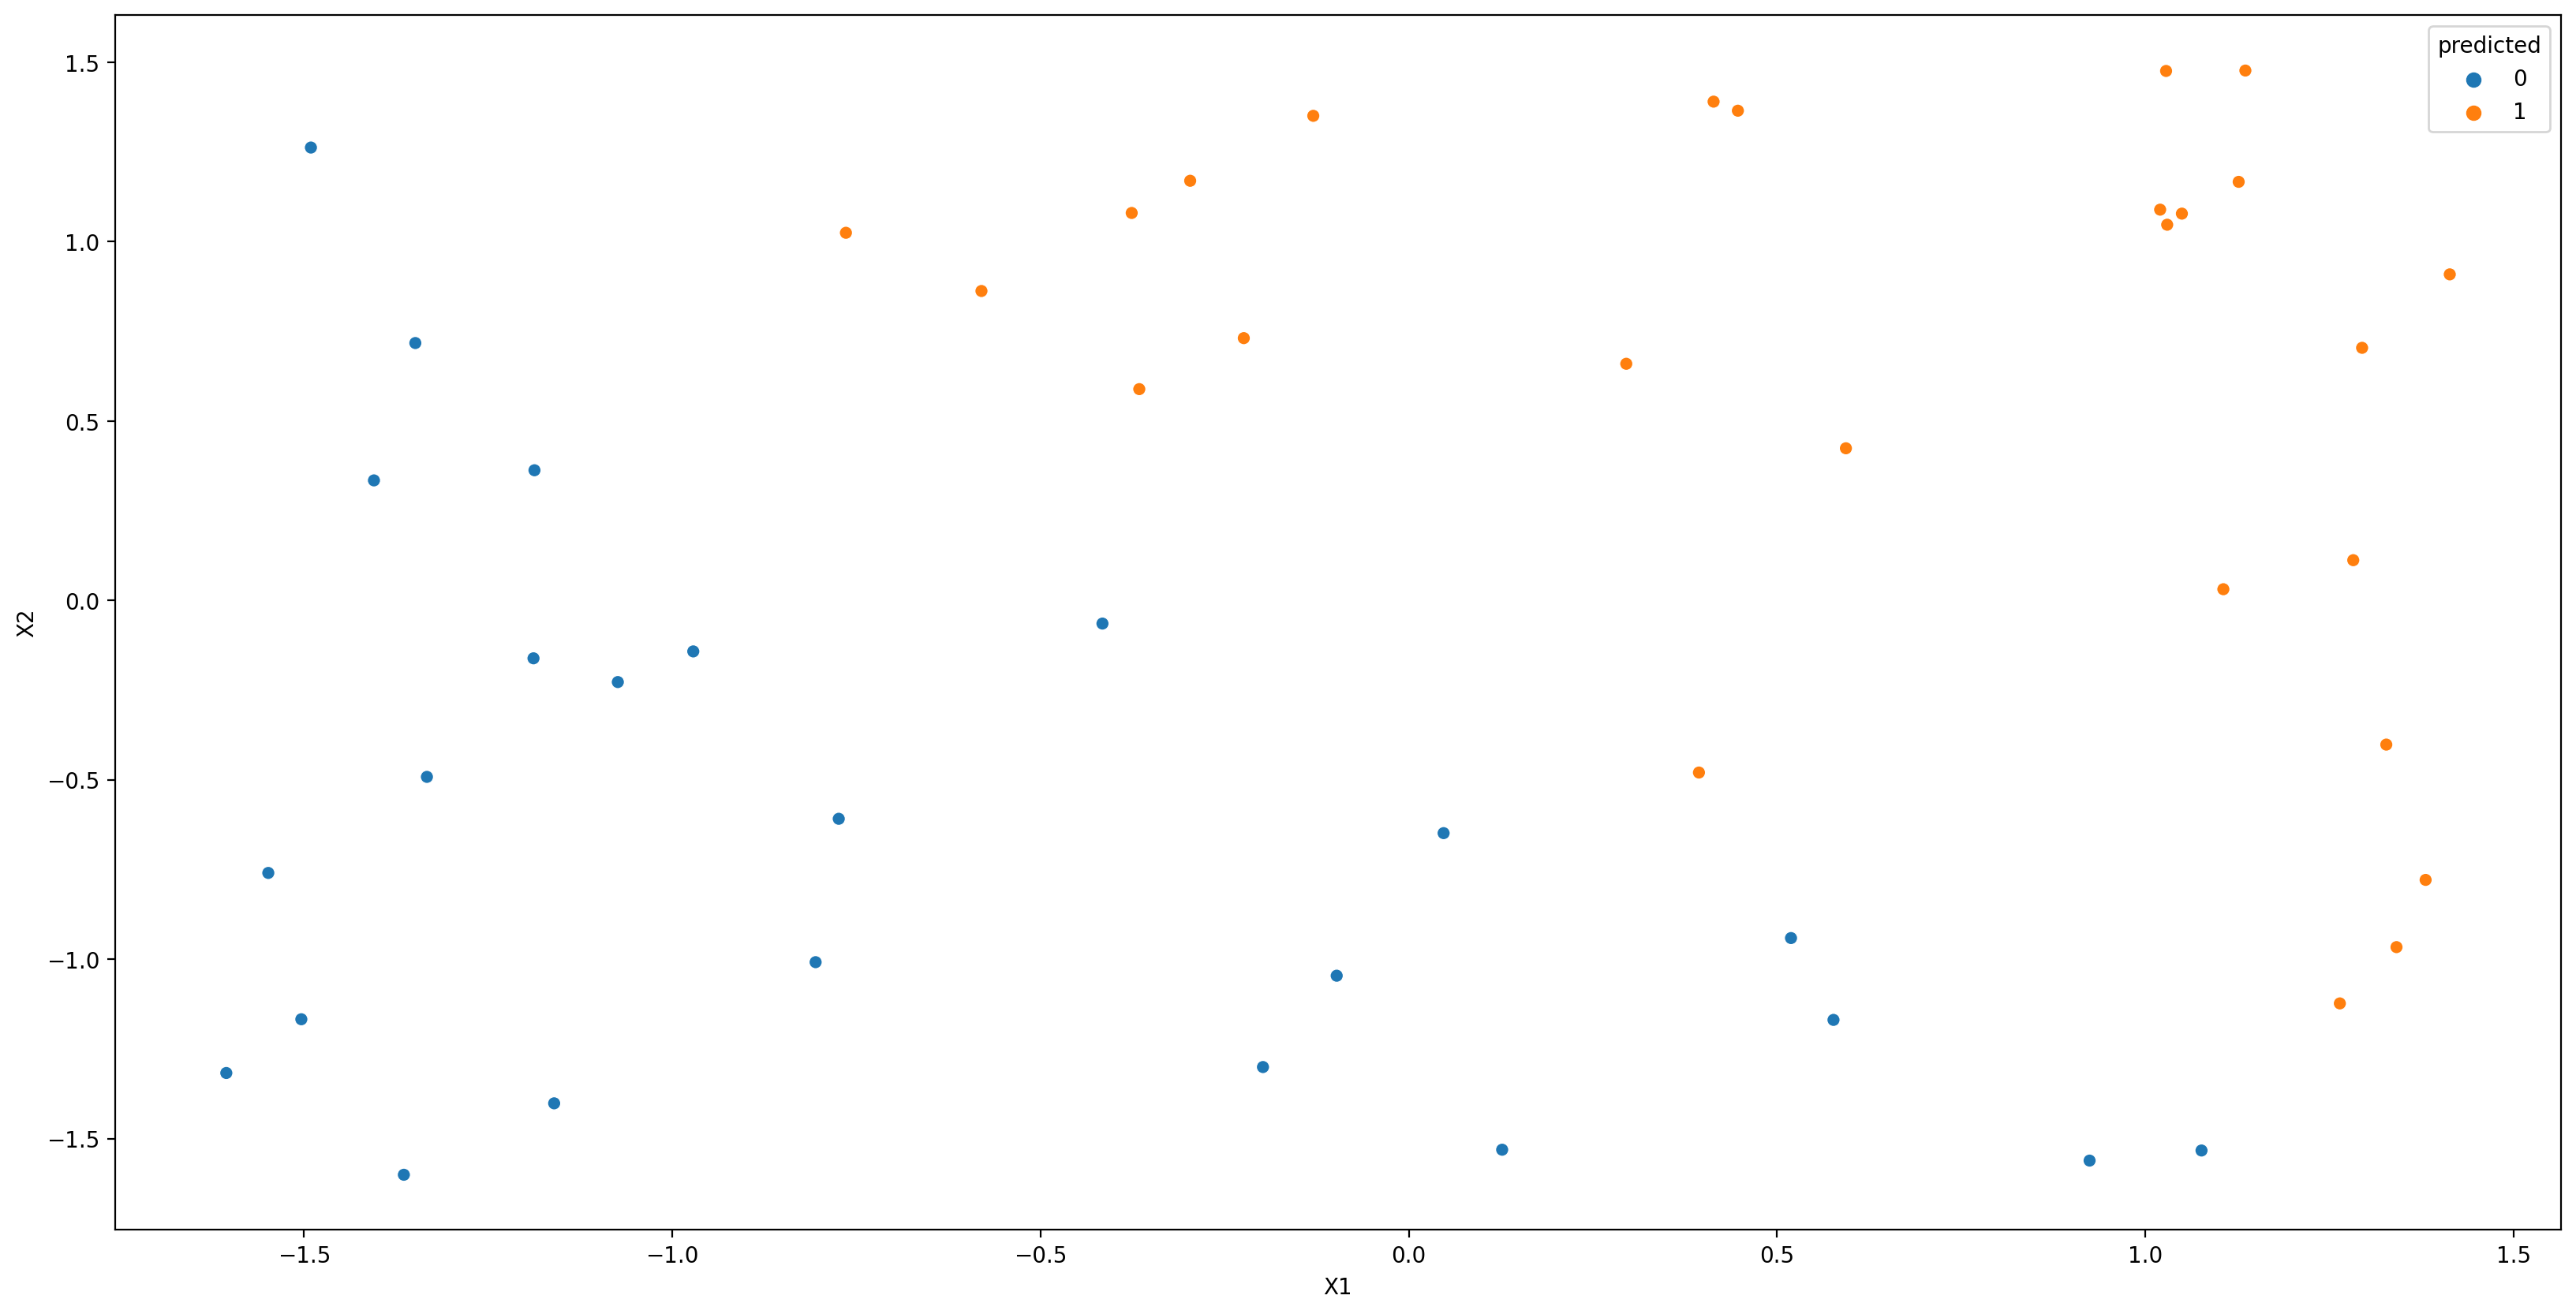

In [298]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = result, x = 'X1', y = 'X2', hue = 'predicted');

# Cost Function
- Sum of square errors (SSE)
    - J(W) = (1 / 2)(sum(y - y_hat))^2 (cost function)
- Objective : find W (weight) that minimize J(W) (cost function) 
- How : using Gradient descent

# Gradient decent
- Climbing down hill : until a cost minimum is reach
- The change in weights dW = -n(dw)
    - n = learning rate : บอกว่าจุดของเราจะขยับไปกว้าง หรือ เเคบ
    - dw = gradient (deivertive) of cost function

# Stochastic gradient decent
- เเตกต่างจาก gradient decent ตรงที่ถ้าเเบบเดิมจะต้อง train model ด้วยทุกๆ observation ก่อนจะอัพเดท weightเเต่ stochastic gradient ไม่จำเป็นต้อง train ด้วย data ทุกตัว
- ทำให้มีโอกาสที่ได้ weight ที่ min cost function ได้เร็วกว่า
- ใช้กับ online learing

# Learning rate matter
- Learning rate : ตัวที่จะบอกว่าเราควรเปลี่ยน weight มากหรือน้อย
- ถ้า Learning rate มากเกินไปทำให้ไม่เจอจุด min cost fuction (เลย, brow up)